In [1]:
# MOUDILA Marcel
# 02 mars 2024 

### Dépistage et diagnostic du cancer de l'œsophage à partir d'images de microscopie in vivo

L'objectif de ce défi est de construire un classificateur d'images pour aider les médecins dans le dépistage et le diagnostic du cancer de l'œsophage. Un tel outil aurait un impact considérable sur la gestion et la vie des patients.

Il y a 11 161 images acquises auprès de 61 patients à classer comme : - Épithélium épidermoïde - Métaplasie intestinale - Métaplasie gastrique - Dysplasie/Cancer 

#### Préliminaire

In [ ]:
# installation de OpenCV, utilitaire pour le traitement des images sur Python
#!pip install opencv-python


import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random



In [3]:
# chagement du data set des labels 
y_train = pd.read_csv("/home/moudilamarcel/Bureau/data/images/TrainingSet_20aimVO.csv")

0 is “Squamous_Epithelium” ; 
1 is “Intestinal_metaplasia” ;
2 is “Gastric_metaplasia” ;
3 is “Dysplasia_and_Cancer”

In [4]:
# affichage du data set des labels
y_train

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0
...,...,...
9441,im_114_55.png,3
9442,im_7_55.png,3
9443,im_52_55.png,3
9444,im_10_55.png,3


In [5]:
# récupération des noms des fichiers des images
nom_image = y_train['image_filename'].unique()
nom_image

array(['im_4_0.png', 'im_21_0.png', 'im_9_0.png', ..., 'im_52_55.png',
       'im_10_55.png', 'im_111_55.png'], dtype=object)

In [6]:
# récupération du répertoire des images et affichage des 5 premiers répertoires
image_paths = [f"/home/moudilamarcel/Bureau/data/images/X_train/{i}" for i in nom_image]
image_paths[:5]


['/home/moudilamarcel/Bureau/data/images/X_train/im_4_0.png',
 '/home/moudilamarcel/Bureau/data/images/X_train/im_21_0.png',
 '/home/moudilamarcel/Bureau/data/images/X_train/im_9_0.png',
 '/home/moudilamarcel/Bureau/data/images/X_train/im_8_0.png',
 '/home/moudilamarcel/Bureau/data/images/X_train/im_15_0.png']

In [7]:
# convertion de chaque image en tableau numpy 
X_train = [cv2.imread(path) for path in image_paths]

In [8]:

# Taille de redimensionnement souhaitée
new_size = (50, 50)

# Redimensionner chaque image dans X_train
X_train_resized = [cv2.resize(image, new_size) for image in X_train]


In [9]:
# dimension de chaque image après redimensionnement
X_train_resized[0].shape

(50, 50, 3)

exemple de Squamous_Epithelium


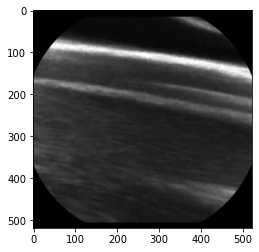

exemple de Intestinal_metaplasia


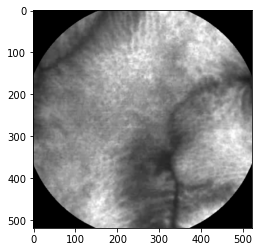

exemple de Gastric_metaplasia


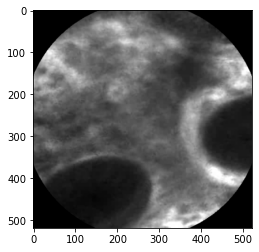

exemple de Dysplasia_and_Cancer


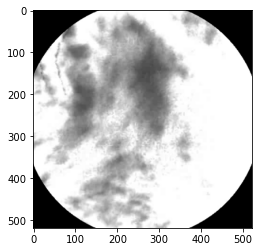

In [10]:
# affichage en clair de premier exemple d'image dans chaque classe avant redimenssionnement
classe = ["Squamous_Epithelium","Intestinal_metaplasia","Gastric_metaplasia","Dysplasia_and_Cancer"]
for i in range(4) :
    image_rgb = cv2.cvtColor(X_train[y_train[y_train["class_number"]==i].index[0]], cv2.COLOR_BGR2RGB)
    print(f"exemple de {classe[i]}")
    plt.imshow(image_rgb)
    #plt.axis('off')
    plt.show()
    



exemple de Squamous_Epithelium


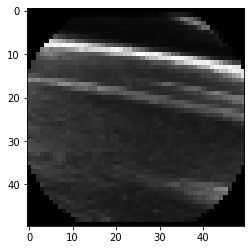

exemple de Intestinal_metaplasia


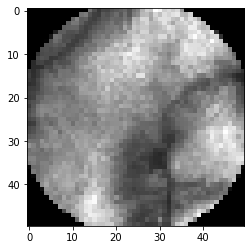

exemple de Gastric_metaplasia


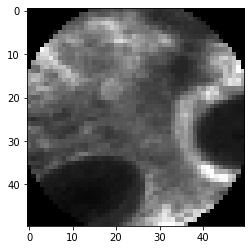

exemple de Dysplasia_and_Cancer


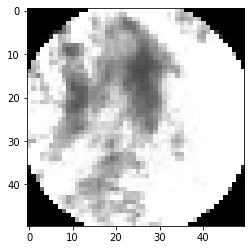

In [11]:
# affichage en clair de premier exemple d'image dans chaque classe après redimenssionnement
classe = ["Squamous_Epithelium","Intestinal_metaplasia","Gastric_metaplasia","Dysplasia_and_Cancer"]
for i in range(4) :
    image_rgb = cv2.cvtColor(X_train_resized[y_train[y_train["class_number"]==i].index[0]], cv2.COLOR_BGR2RGB)
    print(f"exemple de {classe[i]}")
    plt.imshow(image_rgb)
    #plt.axis('off')
    plt.show()

In [12]:
# chargement de y_test
y_test = pd.read_csv("/home/moudilamarcel/Bureau/data/images/test_data_order.csv")

In [13]:
# affichage de y_test
y_test

,image_filename
0,im_1_16.png
1,im_20_16.png
2,im_11_16.png
3,im_14_16.png
4,im_17_16.png
...,...
1710,im_218_60.png
1711,im_243_60.png
1712,im_26_60.png
1713,im_196_60.png


In [14]:
# affichage des noms des fichiers contenant les images de test
nom_image_test = y_test['image_filename'].unique()
nom_image_test

array(['im_1_16.png', 'im_20_16.png', 'im_11_16.png', ..., 'im_26_60.png',
       'im_196_60.png', 'im_225_60.png'], dtype=object)

In [15]:
# exemple de 5 répertoires des images de test
image_paths_test = [f"/home/moudilamarcel/Bureau/data/images/X_test/{i}" for i in nom_image_test]
image_paths_test[:5]

['/home/moudilamarcel/Bureau/data/images/X_test/im_1_16.png',
 '/home/moudilamarcel/Bureau/data/images/X_test/im_20_16.png',
 '/home/moudilamarcel/Bureau/data/images/X_test/im_11_16.png',
 '/home/moudilamarcel/Bureau/data/images/X_test/im_14_16.png',
 '/home/moudilamarcel/Bureau/data/images/X_test/im_17_16.png']

In [16]:
# transformation des images de test en tableau numpy
X_test = [cv2.imread(path) for path in image_paths_test]

In [17]:
# Taille de redimensionnement souhaitée
new_size = (50, 50)

# Redimensionner chaque image dans X_test
X_test_resized = [cv2.resize(image, new_size) for image in X_test]

exemple de quelle classe ???


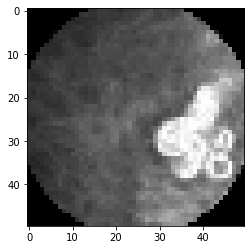

exemple de quelle classe ???


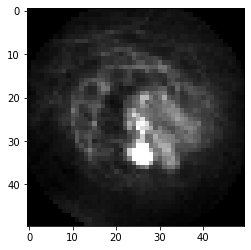

exemple de quelle classe ???


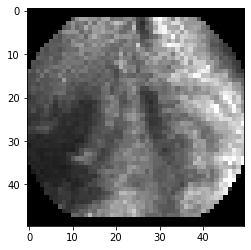

exemple de quelle classe ???


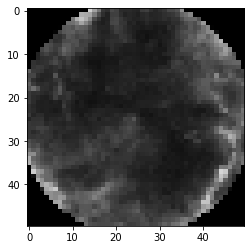

In [18]:
# affichage en clair de 5 images aléatoires de la base de test après redimmensionnement

for i in random.sample(range(1715),4) : 
    image_rgb = cv2.cvtColor(X_test_resized[i], cv2.COLOR_BGR2RGB)
    print("exemple de quelle classe ???")
    plt.imshow(image_rgb)
    #plt.axis('off')
    plt.show()


In [ ]:
# normalisation de X_train
for i in range(9446) : 
    print(i)
    X_train_resized[i] = X_train_resized[i] / 255

In [ ]:
# normalisation de X_test
for i in range(1715) : 
    print(i)
    X_test_resized[i] = X_test_resized[i] / 255

#### Entrainons un modèle de réseau de neurones CNN

In [119]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
def build_cnn_model():

    inputs = keras.Input(shape=(50, 50, 3))
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(4, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [120]:
# Nombre de plis dans la validation croisée
num_folds = 5

# Création d' un générateur de plis stratifiés
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [23]:

X_train_resized_array = np.array(X_train_resized)

In [24]:
X_train_resized_array.shape

(9446, 50, 50, 3)

In [25]:
X_test_resized_array = np.array(X_test_resized)

In [124]:

# Boucle sur les plis
for fold_index, (train_indices, val_indices) in enumerate(stratified_kfold.split(X_train_resized_array, y_train["class_number"])):
    print(f"Training on fold {fold_index + 1}/{num_folds}")

    # Diviser les données en ensembles d'entraînement et de validation
    X_train_fold, X_val_fold = X_train_resized_array[train_indices], X_train_resized_array[val_indices]
    y_train_fold, y_val_fold = y_train["class_number"][train_indices], y_train["class_number"][val_indices]

    # appel du  modèle
    model = build_cnn_model()
    
    # compiler le modèle 

    model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
    
    # Utilisation de l'arrêt précoce pour éviter le surajustement
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Entraînement du modèle sur l'ensemble d'entraînement
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=128, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Évaluation le modèle sur l'ensemble de validation
    evaluation = model.evaluate(X_val_fold, y_val_fold)
    print(f"Validation Accuracy for Fold {fold_index + 1}: {evaluation[1]}")

Training on fold 1/5
Epoch 1/10
60/60 [==============================] - 48s 790ms/step - loss: 1.2945 - accuracy: 0.3797 - val_loss: 1.4246 - val_accuracy: 0.3360
Epoch 2/10
60/60 [==============================] - 46s 770ms/step - loss: 1.2018 - accuracy: 0.4440 - val_loss: 1.9588 - val_accuracy: 0.3788
Epoch 3/10
60/60 [==============================] - 46s 770ms/step - loss: 1.0860 - accuracy: 0.5314 - val_loss: 1.2090 - val_accuracy: 0.4566
Epoch 4/10
60/60 [==============================] - 46s 775ms/step - loss: 0.9280 - accuracy: 0.6046 - val_loss: 1.0399 - val_accuracy: 0.5180
Epoch 5/10
60/60 [==============================] - 47s 788ms/step - loss: 0.8256 - accuracy: 0.6562 - val_loss: 0.7166 - val_accuracy: 0.7037
Epoch 6/10
60/60 [==============================] - 48s 800ms/step - loss: 0.7120 - accuracy: 0.7163 - val_loss: 1.0914 - val_accuracy: 0.6053
Epoch 7/10
60/60 [==============================] - 46s 773ms/step - loss: 0.6297 - accuracy: 0.7553 - val_loss: 0.8738 -

In [29]:
# les prédictions correspondent à la probabilité de prédiction de chaque classe
y_pred = model(X_test_resized_array).numpy()
y_pred

array([[0.83433217, 0.04062915, 0.05501186, 0.07002675],
       [0.5837355 , 0.13369025, 0.11333255, 0.16924167],
       [0.7361857 , 0.06147073, 0.05869874, 0.14364475],
       ...,
       [0.07928037, 0.21710996, 0.47145897, 0.23215075],
       [0.05400939, 0.3654522 , 0.41247407, 0.1680643 ],
       [0.17159472, 0.38406083, 0.2845965 , 0.159748  ]], dtype=float32)

In [30]:
# la classe prédite est celle ayant la plus grande probabilité
np.argmax(y_pred, axis=1)

array([0, 0, 0, ..., 2, 2, 1])

In [32]:
df_pred = y_test.copy()
df_pred["class_pred"] = np.argmax(y_pred, axis=1)
df_pred

,image_filename,class_pred
0,im_1_16.png,0
1,im_20_16.png,0
2,im_11_16.png,0
3,im_14_16.png,0
4,im_17_16.png,0
...,...,...
1710,im_218_60.png,2
1711,im_243_60.png,2
1712,im_26_60.png,2
1713,im_196_60.png,2
